<a href="https://colab.research.google.com/github/rokmr/Machine-Learning/blob/firstBranch/Neural_Network(from_Sratch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author : [Rohit Kumar](https://www.linkedin.com/in/rohitronie/)

In [191]:
#import
import math
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Derivative of a function
<p align = 'center'>
  <img src='https://raw.githubusercontent.com/rokmr/Machine-Learning/firstBranch/colabImages/derivative.jpeg', height=50>
</p>

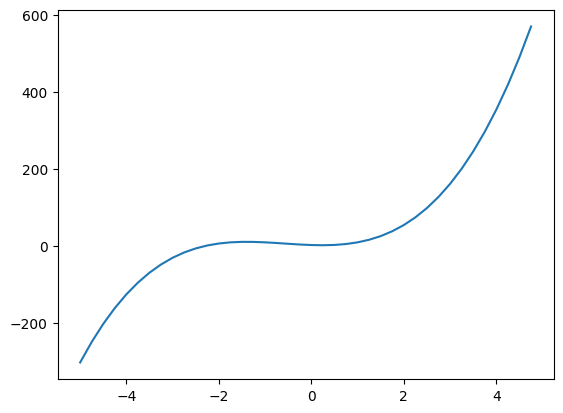

In [2]:
#defining function
def f(x):
  return 4*x**3 + 7*x**2 - 4*x + 2

xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [3]:
h = 0.000001

#Taking deivative
def d_f(f,x):
  global h
  return (f(x + h) - f(x))/h

d_f(f,3)

146.00004303133574

In [4]:
def f1(a,b,c):
  return a*b + c

def f2(a,b,c,d):
  if d=='a': a+=h;
  elif d=='b': b+=h
  elif d=='c': c+=h
  return a*b + c

def der(a:int,b:int,c:int,d:str):
  global h
  return (f2(a,b,c,d) - f1(a,b,c))/h

a = 2.0
b = -3.0
c = 10.0
print(f"Derivative wrt a: {der(a,b,c,'a')}")
print(f"Derivative wrt b: {der(a,b,c,'b')}")
print(f"Derivative wrt c: {der(a,b,c,'c')}")

Derivative wrt a: -3.000000000419334
Derivative wrt b: 2.000000000279556
Derivative wrt c: 0.9999999992515995


# Value Class
As Neural have massive structure and to maintain it we create a datastructure to keep track

## Value : Basic

In [5]:
class Value:
  def __init__(self, data):
    self.data = data

  def __repr__(self):                   # return this string when called
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data)
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data)
    return out

a = Value(2)
b = Value(-3)
c = Value(10)
d = a*b+c
d

Value(data=4)

Here inabove data structure we don't have info how the d is created i.e., cilderens of d and operation between these children. This is required while back prop.

## Value: Child & operation

In [6]:
class Value:
  def __init__(self, data, _children =(), _op=''):                    #vhildren id kept empty set as initialization, while operation as string
    self.data = data
    self._prev = set(_children)
    self._op = _op

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, _children = (self, other), _op = '+')
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, _children = (self, other), _op = '*')
    return out

a = Value(2)
b = Value(-3)
c = Value(10)
d = a*b+c
d

Value(data=4)

In [7]:
d._prev

{Value(data=-6), Value(data=10)}

In [8]:
d._op

'+'

##graphviz

For more details on [graphviz]("https://graphviz.readthedocs.io/en/stable/manual.html")

In [9]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

In [10]:
trace(d)

({Value(data=-3),
  Value(data=-6),
  Value(data=10),
  Value(data=2),
  Value(data=4)},
 {(Value(data=-3), Value(data=-6)),
  (Value(data=-6), Value(data=4)),
  (Value(data=10), Value(data=4)),
  (Value(data=2), Value(data=-6))})

In [11]:
def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))                           # getting unique id for the object

    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{  data %.4f  }" % ( n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


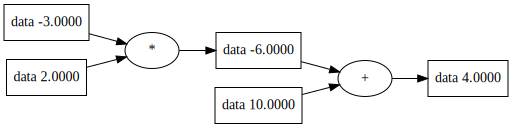

In [12]:
draw_dot(d)

Adding label to each value object, this will make visulization easier as there will be value label for each value

## Value: label

In [13]:
class Value:
  def __init__(self, data, _children =(), _op='', label=''):                  # adding label
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, _children = (self, other), _op = '+')
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, _children = (self, other), _op = '*')
    return out

a = Value(2.0, label='a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e+c; d.label = 'd'
d

Value(data=4.0)

In [14]:
def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    dot.node(name = uid, label = "{ %s | data %.4f  }" % (n.label, n.data), shape='record')   #added label to graph
    if n._op:
      dot.node(name = uid + n._op, label = n._op)
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

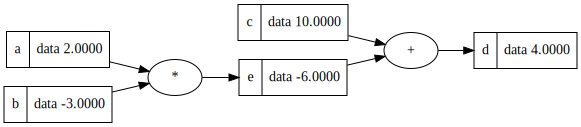

In [15]:
draw_dot(d)

In [16]:
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L                                                             #Loss

Value(data=-8.0)

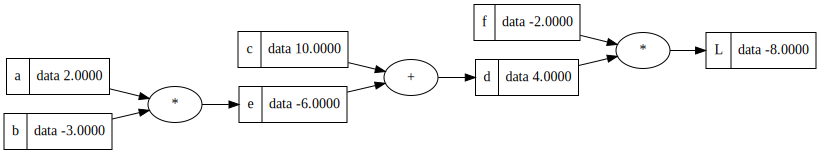

In [17]:
draw_dot(L)

## Value : Grad

Now, here we will introduce gradient in the Value Class

In [18]:
class Value:
  def __init__(self, data, _children =(), _op='', label=''):
    self.data = data
    self.grad = 0.0                       #At initialization doesnot effect the output
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, _children = (self, other), _op = '+')
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, _children = (self, other), _op = '*')
    return out

a = Value(2.0, label='a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b; e.label = 'e'
d = e+c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [19]:
def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f  }" % (n.label, n.data, n.grad), shape='record')   #added grad
    if n._op:
      dot.node(name = uid + n._op, label = n._op)
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

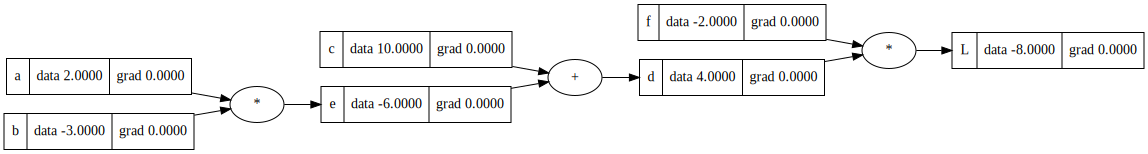

In [20]:
draw_dot(L)

## Value: Non-Linearity

A neuron have weights, bias & activaiton


![Neuron](https://github.com/rokmr/Machine-Learning/raw/firstBranch/colabImages/cs231n%20Neuron.jfif)

Here we will be using tanh as activation fuction.
<p align="center">
  <img src="https://raw.githubusercontent.com/rokmr/Machine-Learning/firstBranch/colabImages/tanh.jpeg">
  <img src="https://raw.githubusercontent.com/rokmr/Machine-Learning/firstBranch/colabImages/d_tanh.jpeg">
<p/>

In [21]:
#Adding tanh to Value
class Value:
  def __init__(self, data, _children =(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, _children = (self, other), _op = '+')
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, _children = (self, other), _op = '*')
    return out

  def tanh(self):                                                                           #Adding tanh
    x = self.data
    temp = (math.exp(2*x)-1) / (math.exp(2*x)+1)
    out = Value(temp, _children=(self, ), _op = "tanh")
    return out

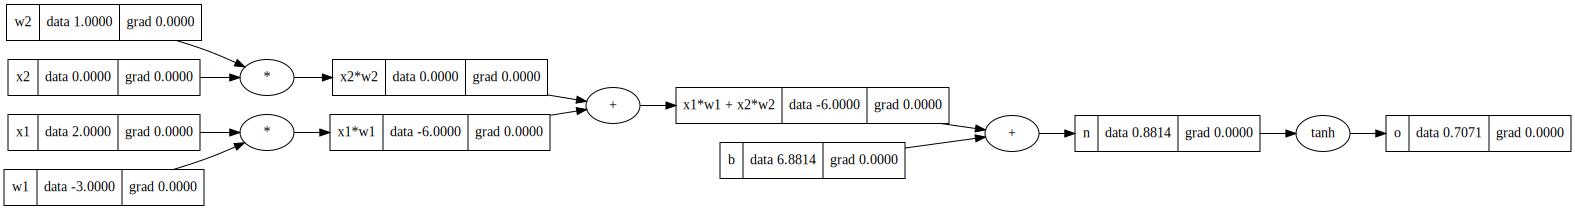

In [22]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)



## Value: Back Propagartion

In [23]:
#Adding tanh to Value
class Value:
  def __init__(self, data, _children =(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda:None                # Initializing for leaf node
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, _children = (self, other), _op = '+')

    def _backward():                            # Backwarding
      self.grad=1.0*out.grad
      other.grad= 1.0*out.grad
    out._backward=_backward                    # Storing the function
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, _children = (self, other), _op = '*')

    def _backward():                            # Backwarding
      self.grad = other.data * out.grad
      other.grad = self.data * out.grad
    out._backward = _backward                 # Storing the function
    return out

  def tanh(self):
    x = self.data
    temp = (math.exp(2*x)-1) / (math.exp(2*x)+1)
    out = Value(temp, _children=(self, ), _op = "tanh")

    def _backward():                             # Backwarding
      self.grad = (1-temp**2) * out.grad
    out._backward = _backward                   # Storing the function
    return out

In [24]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

As we have set our initial grad to zero. We need to make it initialized with 1 for o

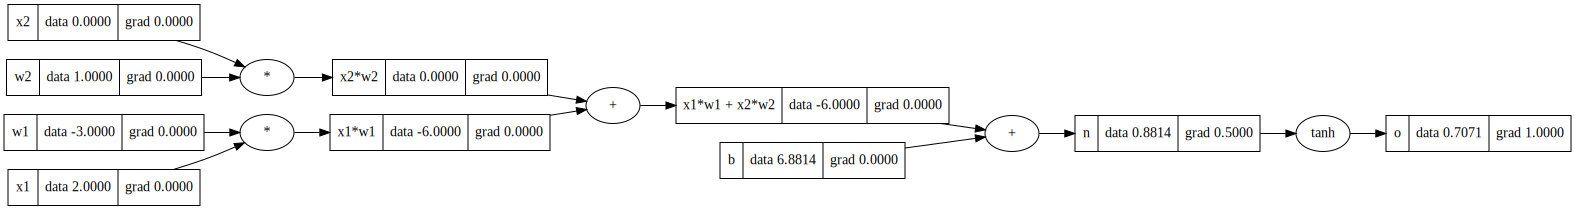

In [25]:
o.grad = 1
o._backward()
draw_dot(o)

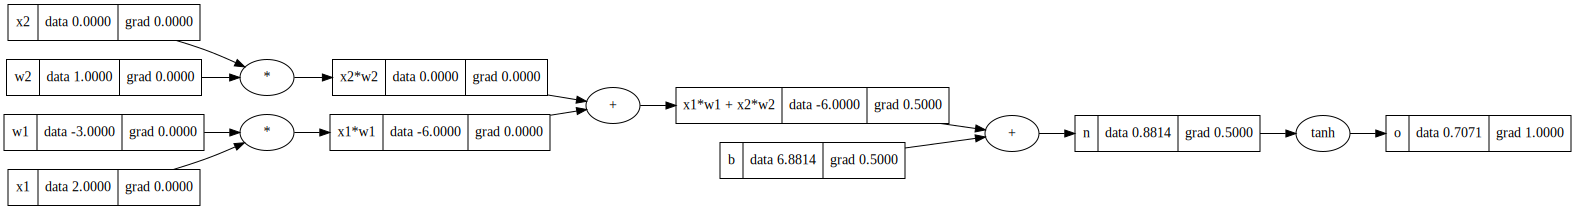

In [26]:
n._backward()
draw_dot(o)

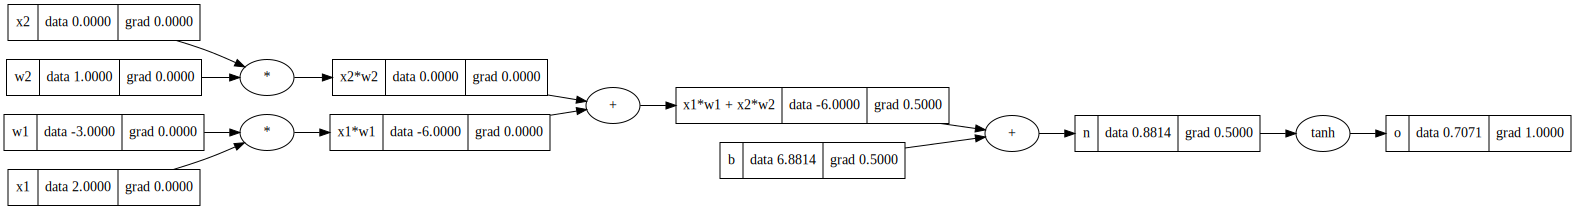

In [27]:
b._backward()
draw_dot(o)

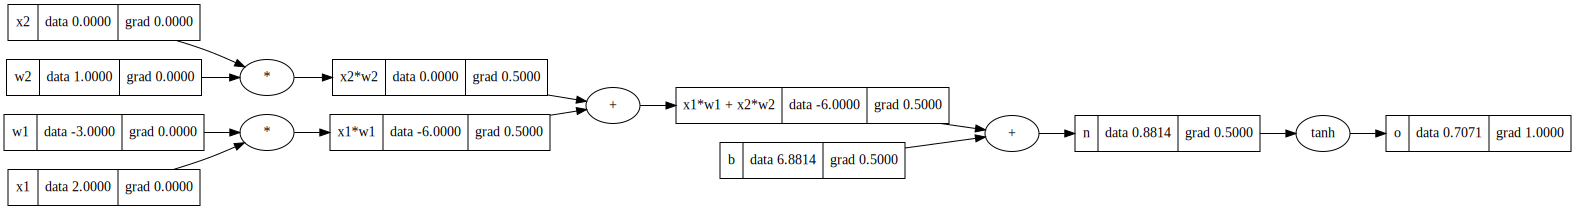

In [28]:
x1w1x2w2._backward()
draw_dot(o)

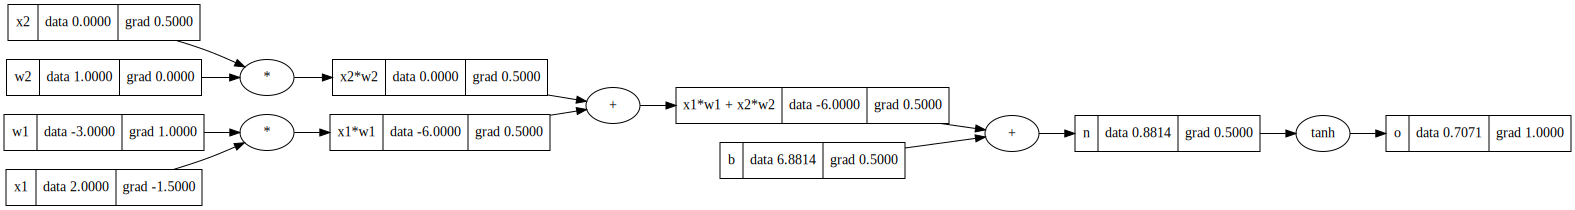

In [29]:
x1w1._backward()
x2w2._backward()
draw_dot(o)

Above can be achieved in more efficient ways. Using topological graph.

In [30]:
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo

[Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

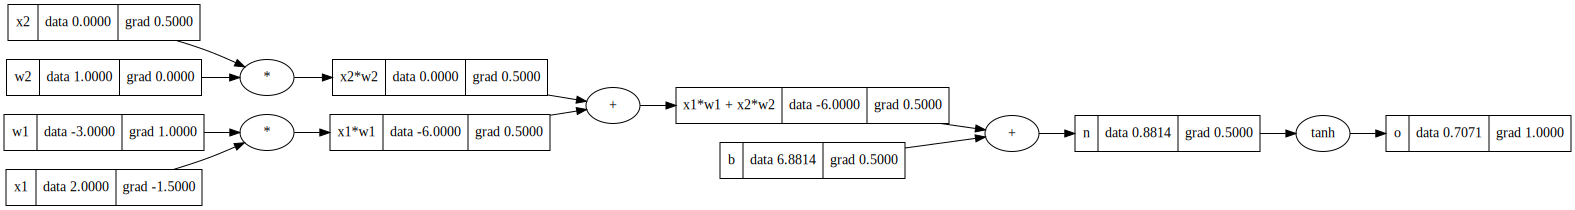

In [31]:
o.grad = 1.0
for node in reversed(topo):
  node._backward()
draw_dot(o)

Incorporating Efficient Way in the class

In [32]:
#Adding tanh to Value
class Value:
  def __init__(self, data, _children =(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda:None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, _children = (self, other), _op = '+')

    def _backward():
      self.grad=1.0*out.grad
      other.grad= 1.0*out.grad
    out._backward=_backward
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, _children = (self, other), _op = '*')

    def _backward():
      self.grad = other.data * out.grad
      other.grad = self.data * out.grad
    out._backward = _backward
    return out

  def tanh(self):
    x = self.data
    temp = (math.exp(2*x)-1) / (math.exp(2*x)+1)
    out = Value(temp, _children=(self, ), _op = "tanh")

    def _backward():
      self.grad = (1-temp**2) * out.grad
    out._backward = _backward
    return out

  def backward(self):                                             # Incorporating efficient way of backward
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad=1
    for node in reversed(topo):
      node._backward()


In [33]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

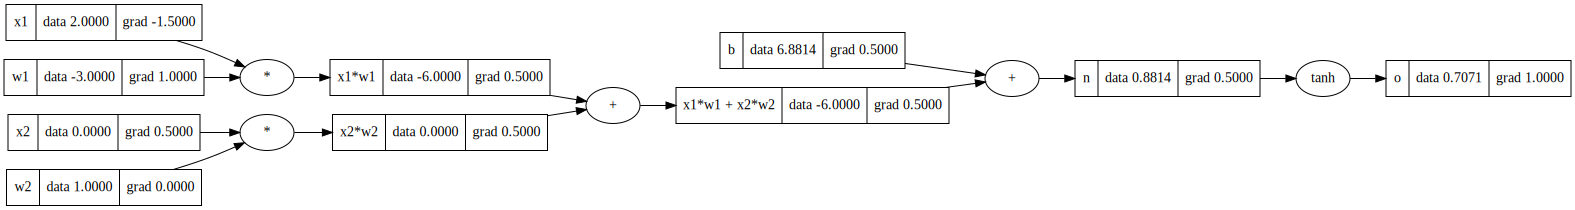

In [34]:
o.backward()
draw_dot(o)

fixing the case when we have same value added to produce next value

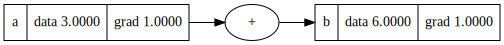

In [35]:
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)

In [36]:
class Value:
  def __init__(self, data, _children =(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda:None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, _children = (self, other), _op = '+')

    def _backward():
      self.grad += 1.0*out.grad       #
      other.grad += 1.0*out.grad     #
    out._backward=_backward
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, _children = (self, other), _op = '*')

    def _backward():
      self.grad += other.data * out.grad     #
      other.grad += self.data * out.grad     #
    out._backward = _backward
    return out

  def tanh(self):
    x = self.data
    temp = (math.exp(2*x)-1) / (math.exp(2*x)+1)
    out = Value(temp, _children=(self, ), _op = "tanh")

    def _backward():
      self.grad += (1-temp**2) * out.grad     #
    out._backward = _backward
    return out

  def backward(self):
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad=1
    for node in reversed(topo):
      node._backward()

## Value: Fixing Issues

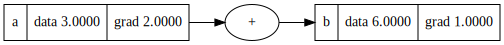

In [37]:
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)

In [38]:
# Issue 1
a = Value(2)
a+1


AttributeError: ignored

In [39]:
# Issue 2
1 + a

TypeError: ignored

Solving above issues

In [41]:
class Value:
  def __init__(self, data, _children =(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda:None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)   #1
    out = Value(self.data + other.data, _children = (self, other), _op = '+')

    def _backward():
      self.grad += 1.0*out.grad
      other.grad += 1.0*out.grad
    out._backward=_backward
    return out

  def __radd__(self, other):   #other+self      #2
    return self + other

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)     #1
    out = Value(self.data * other.data, _children = (self, other), _op = '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
    return out


  def __rmul__(self, other):   #other*self   #2
    return self * other

  def exp(self):               # making exp function
    x = self.data
    out = Value(math.exp(x), _childre=(self,), _op='exp')

    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward
    return out

  def tanh(self):
    x = self.data
    temp = (math.exp(2*x)-1) / (math.exp(2*x)+1)
    out = Value(temp, _children=(self, ), _op = "tanh")

    def _backward():
      self.grad += (1-temp**2) * out.grad
    out._backward = _backward
    return out

  def backward(self):
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad=1
    for node in reversed(topo):
      node._backward()

In [42]:
# Issue 1 solved
a = Value(2)
a+1

Value(data=3)

In [43]:
1+a

Value(data=3)

Including division like operation

In [44]:
#Issue 1
a = Value(10)
b = Value(5)
a/b

TypeError: ignored

In [46]:
#Issue 2
a-b

TypeError: ignored

above can be implemented as a*(b**-1) whic is more general case

In [47]:
class Value:
  def __init__(self, data, _children =(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda:None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, _children = (self, other), _op = '+')

    def _backward():
      self.grad += 1.0*out.grad
      other.grad += 1.0*out.grad
    out._backward=_backward
    return out

  def __radd__(self, other):
    return self + other

  def __neg__(self):       #2
    return self * -1

  def __sub__(self, other):    #2
    return self + (-other)


  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, _children = (self, other), _op = '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
    return out


  def __rmul__(self, other):
    return self * other

  def __truediv__(self, other): #1
    return self * other**-1

  def __pow__(self, other):      #1
    assert isinstance(other, (int, float))
    out = Value(self.data**other, _children=(self,), _op=f"**{other}")

    def _backward():
      self.grad= other  * self.data**(other-1) * out.grad
    out._backward = _backward
    return out

  def exp(self):
    x = self.data
    out = Value(math.exp(x), _children=(self,), _op='exp')

    def _backward():
      self.grad += out.data * out.grad
    out._backward = _backward
    return out

  def tanh(self):
    x = self.data
    temp = (math.exp(2*x)-1) / (math.exp(2*x)+1)
    out = Value(temp, _children=(self, ), _op = "tanh")

    def _backward():
      self.grad += (1-temp**2) * out.grad
    out._backward = _backward
    return out

  def backward(self):
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad=1
    for node in reversed(topo):
      node._backward()

In [48]:
a = Value(10)
b = Value(5)
a/b

Value(data=2.0)

In [49]:
a-b

Value(data=5)

In [50]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

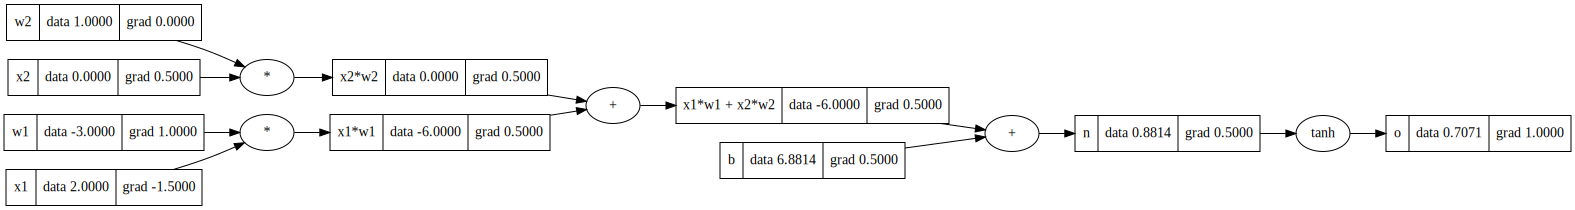

In [51]:
o.backward()
draw_dot(o)

Above using pytorch

In [52]:
import torch
# These are leaf node we need to define reqire_grad
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


## Neural Network

In [53]:
import random

In [54]:
# creating A Neuron
class Neuron:
  def __init__(self, nin):       #nin - Neuron input
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self, x):
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out


In [55]:
x = [2.0, 3.0]
n = Neuron(2)
n(x)

Value(data=-0.9120893627526837)

In [56]:
class Layer:
  def __init__(self, nin:int, nout:int):
    self.neurons = [Neuron(nin) for _ in range(nout) ]       #nout Neurons with each having nin as input

  def __call__(self, x):                                    # Takng output for each neurons ie, nout neurons
    outs  =  [n(x) for n in self.neurons]
    return outs[0] if len(outs)==1 else outs

In [57]:
class MLP:
  def __init__(self, nin:int , nouts:list):
    sz = [nin] + nouts # creating a big list
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

<p>
  <img src="https://raw.githubusercontent.com/rokmr/Machine-Learning/firstBranch/colabImages/MLP.png", width=600, height=250/>
</p>




In [58]:
x = [2.0, 3.0, -1.0]
nn = MLP(3,[4,4,1])
nn(x)

Value(data=-0.5744945130228859)

In [59]:
# Dataset
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

We want this neural network fine with this dataset we need to train this model.

In [60]:
ypred = [nn(x) for x in xs]
ypred

[Value(data=-0.5744945130228859),
 Value(data=-0.11298450216248486),
 Value(data=0.44256611433672094),
 Value(data=-0.6304718642121837)]

In [61]:
loss = sum([(y_pred-y)**2 for y_pred, y in zip(ypred, ys)])
loss

Value(data=8.00526495916321)

In [62]:
loss.backward()

Here we can back propagate but we are unable to update the weights. Intoducing parameters

In [63]:
class Neuron:
  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self, x):
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out

  def parameters(self):
    return self.w + [self.b]

class Layer:
  def __init__(self, nin:int, nout:int):
    self.neurons = [Neuron(nin) for _ in range(nout) ]

  def __call__(self, x):
    outs  =  [n(x) for n in self.neurons]
    return outs[0] if len(outs)==1 else outs

  def parameters(self):
    return[p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
  def __init__(self, nin:int , nouts:list):
    sz = [nin] + nouts # creating a big list
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    return[p for layer in self.layers for p in layer.parameters()]

In [64]:
nn = MLP(3,[4,4,1])

In [65]:
ypred = [nn(x) for x in xs]
loss = sum([(y_pred-y)**2 for y_pred, y in zip(ypred, ys)])
loss

Value(data=6.69415338037725)

In [66]:
loss.backward()

In [67]:
#updating parameters
for p in nn.parameters():
  p.data -= 0.01 * p.grad

In [68]:
ypred = [nn(x) for x in xs]
loss = sum([(y_pred-y)**2 for y_pred, y in zip(ypred, ys)])
loss

Value(data=6.307637303154804)

In [69]:
from tqdm.auto import tqdm
EPOCH = 100
LR = 0.01

In [70]:
nn = MLP(3,[4,4,1])
LOSS = []
# Making loop:
for k in tqdm(range(EPOCH)):
  #Forward pass
  ypred = [nn(x) for x in xs]
  loss = sum([(y_pred-y)**2 for y_pred, y in zip(ypred, ys)])
  LOSS.append(loss)

  #Making previous grad as zero
  for p in nn.parameters():
    p.data -= LR * p.grad

  #Back prop
  loss.backward()

  #Updating Parmeters
  for p in nn.parameters():
    p.data -= LR * p.grad

  if (k+1)%10 == 0:
    print(f"EPOCH: {k+1} || Loss: {loss}")

  0%|          | 0/100 [00:00<?, ?it/s]

EPOCH: 10 || Loss: Value(data=1.7103876150635475)
EPOCH: 20 || Loss: Value(data=8.999153536074304e-09)
EPOCH: 30 || Loss: Value(data=1.2980579074179471e-11)
EPOCH: 40 || Loss: Value(data=5.113563974494598e-15)
EPOCH: 50 || Loss: Value(data=2.0891647887346708e-18)
EPOCH: 60 || Loss: Value(data=9.008529959236393e-22)
EPOCH: 70 || Loss: Value(data=4.0198241527141295e-25)
EPOCH: 80 || Loss: Value(data=1.8450717016020821e-28)
EPOCH: 90 || Loss: Value(data=2.465190328815662e-32)
EPOCH: 100 || Loss: Value(data=0.0)


In [71]:
ypred

[Value(data=1.0), Value(data=-1.0), Value(data=-1.0), Value(data=1.0)]

# Summary
1. We formed a value class for maintaining the datastructure of neural network
2. Then we formed a class for the neurons, layer, mlp
3. make a neural network ffrom mlp
4. train for use purpose.  




In [72]:
class Value():
  def __init__(self,data):#1 inputting data
    self.data = data

  def __repr__(self):#2 making output format
    return f"Value(data={self.data})"

  def __add__(self, other):#3 Introducing add op
    other = other if isinstance(other, Value) else Value(other)   #4 Solving Scalar issue (a+1)
    out = Value(self.data + other.data)
    return out

  def __radd__(self, other):#5 Solving  of scalar and Value  (1+a)
    return self +other

  def __mul__(self, other):   #6 Introducing mul op
    other = other if isinstance(other, Value) else Value(other) #7 Solving scalar issue
    out = Value(self.data * other.data)
    return out

  def __rmul__(self, other):#8 similar to 5
    return self * other

  def __neg__(self):   #9 setting for subtaction
    return  -1 * self

  def __sub__(self, other): #10 subtaction operation using add and neg
    return self + (-other)

  def __pow__(self, k): #11 Setting up for div and more general case
    assert isinstance(k, (int, float))
    out= Value(self.data**k)
    return out

  def __truediv__(self, other):#12 div
    return self * (other**-1)


In [73]:
class Value():
  def __init__(self,data, _children=(), _op='', label=''):#1 Introducing _children, _op, label
    self.data = data
    self.grad = 0                                         #2 grad and _backward
    self._backward = lambda: None
    self._prev=set(_children)
    self._op = _op
    self.label=label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, _children=(self, other), _op='+') #3 _children & _op

    def _backward():                          #4 backward
      self.grad += 1.0*out.grad
      other.grad += 1.0*out.grad
    out._backward = _backward
    return out

  def __radd__(self, other):
    return self + other

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, _children=(self, other), _op='*') #5 _children & _op
    def _backward():                          #6 backward
      self.grad += other.data*out.grad
      other.grad += self.data*out.grad
    out._backward = _backward

    return out

  def __rmul__(self, other):
    return self * other

  def __neg__(self):
    return  self * -1

  def __sub__(self, other):
    return self + (-other)

  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out= Value(self.data**other, _children=(self,), _op=f'**{other}') #7 _children & _op

    def _backward():                          #8 backward
      self.grad += other*(self.data**(other-1))*out.grad

    out._backward = _backward
    return out

  def __truediv__(self, other):
    return self * (other**-1)

  def tanh(self):   #9
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    return out

  def backward(self):  #10 building topological graph for back prop
    topo = []
    visited_node = set()
    def build_topo(v):
      if v  not in visited_node:
        visited_node.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)

    build_topo(self)
    self.grad=1.0
    for node in reversed(topo):
      node._backward()


In [74]:
class Neuron:
  def __init__(self,nin:int):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self,x):
    act = sum((wi*xi for wi,xi in zip(self.w, x)),self.b)
    out = act.tanh()
    return out

  def parameters(self):
    return self.w + [self.b]

class Layer:
  def __init__(self,nin:int,nout:int):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self,x):
    outs = [neuron(x) for neuron in self.neurons]
    return outs[0] if len(outs)==1 else outs

  def parameters(self):
    return [p for n in self.neurons for p in n.parameters()]

class MLP:
  def __init__(self, nin:int, nout:list):
    sz = [nin]+ nout
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nout)) ]

  def __call__(self,x):
    for layer in self.layers:
      out = layer(x)
    return out

  def parameters(self):
    return [p for l in self.layers for p in l.parameters()]

In [75]:
# Dataset
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [76]:
nn = MLP(3,[4,4,1])
LOSS = []
# Making loop:
for k in tqdm(range(EPOCH)):
  #Forward pass
  ypred = [nn(x) for x in xs]
  loss = sum([(y_pred-y)**2 for y_pred, y in zip(ypred, ys)])
  LOSS.append(loss)

  #Making previous grad as zero
  for p in nn.parameters():
    p.data -= LR * p.grad

  #Back prop
  loss.backward()

  #Updating Parmeters
  for p in nn.parameters():
    p.data -= LR * p.grad

  if (k+1)%10 == 0:
    print(f"EPOCH: {k+1} || Loss: {loss}")

  0%|          | 0/100 [00:00<?, ?it/s]

EPOCH: 10 || Loss: Value(data=3.423927030303269)
EPOCH: 20 || Loss: Value(data=3.4201982462365967e-10)
EPOCH: 30 || Loss: Value(data=3.085409071322555e-11)
EPOCH: 40 || Loss: Value(data=2.8420504817417145e-12)
EPOCH: 50 || Loss: Value(data=2.6178795064271607e-13)
EPOCH: 60 || Loss: Value(data=2.4113883804790022e-14)
EPOCH: 70 || Loss: Value(data=2.2211841477368653e-15)
EPOCH: 80 || Loss: Value(data=2.045982602699866e-16)
EPOCH: 90 || Loss: Value(data=1.8846004518692917e-17)
EPOCH: 100 || Loss: Value(data=1.7359478387691737e-18)


#Advanced

In [167]:
class Value():
  def __init__(self,data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0
    self._backward = lambda: None
    self._prev=set(_children)
    self._op = _op
    self.label=label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, _children=(self, other), _op='+')

    def _backward():
      self.grad += 1.0*out.grad
      other.grad += 1.0*out.grad
    out._backward = _backward
    return out

  def __radd__(self, other):
    return self + other


  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, _children=(self, other), _op='*')
    def _backward():
      self.grad += other.data*out.grad
      other.grad += self.data*out.grad
    out._backward = _backward
    return out

  def __rmul__(self, other):
    return self * other

  def __neg__(self):
    return  self * -1

  def __sub__(self, other):
    return self + (-other)

  def __rsub__(self, other): # Issue solved
    return other + (-self)

  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out= Value(self.data**other, _children=(self,), _op=f'**{other}')

    def _backward():
      self.grad += other*(self.data**(other-1))*out.grad

    out._backward = _backward
    return out

  def __truediv__(self, other):
    return self * (other**-1)

  def __rtruediv__(self, other): # Another Issue solved
    return other * self**-1

  def tanh(self):   #9
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    return out

  def relu(self):   #ReLU included
    out = Value(0 if self.data < 0 else self.data, (self,), 'ReLU')

    def _backward():
        self.grad += (out.data > 0) * out.grad
    out._backward = _backward

    return out

  def backward(self):
    topo = []
    visited_node = set()
    def build_topo(v):
      if v  not in visited_node:
        visited_node.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)

    build_topo(self)
    self.grad=1.0
    for node in reversed(topo):
      node._backward()


In [168]:
class Module:      #Module  included to resolve zero_grad issue

    def zero_grad(self):
        for p in self.parameters():
            p.grad = 0

    def parameters(self):
        return []

class Neuron(Module):
  def __init__(self,nin:int):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self,x):
    act = sum((wi*xi for wi,xi in zip(self.w, x)),self.b)
    out = act.tanh()
    return out

  def parameters(self):
    return self.w + [self.b]

  def __repr__(self):
    return f"TanhNeuron({len(self.w)})"


class Layer(Module):
  def __init__(self,nin:int,nout:int):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self,x):
    outs = [neuron(x) for neuron in self.neurons]
    return outs[0] if len(outs)==1 else outs

  def parameters(self):
    return [p for n in self.neurons for p in n.parameters()]

  def __repr__(self):
    return f"Layer of [{', '.join(str(n) for n in self.neurons)}]"


class MLP(Module):
  def __init__(self, nin:int, nout:list):
    sz = [nin]+ nout
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nout)) ]

  def __call__(self,x):
    for layer in self.layers:
      out = layer(x)
    return out

  def parameters(self):
    return [p for l in self.layers for p in l.parameters()]

  def __repr__(self):
        return f"MLP of [{', '.join(str(layer) for layer in self.layers)}]"

In [169]:
# loss function
def loss(batch_size=None, loss_type=None):

    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]

    scores = list(map(model, inputs))

    #Losses
    if loss_type == None or loss_type=="MSE":    #MSE LOSS
      losses = [(yi-scorei)**2 for yi , scorei in zip(yb, scores)]

    elif loss_type == "SVM":
      losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]

    else:
      print("Loss is not defined")

    data_loss = sum(losses) * (1.0 / len(losses))

    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))

    total_loss = data_loss + reg_loss

    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=Value(data=0.5096680551965986)) 0.784


##Dataset

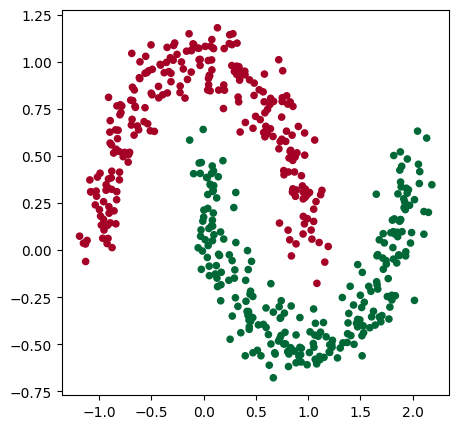

In [170]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.1)

y = y*2 - 1 # make y be -1 or 1

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='RdYlGn')

##Model

In [174]:
# initialize a model
model = MLP(2, [8, 8, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2), TanhNeuron(2)], Layer of [TanhNeuron(8), TanhNeuron(8), TanhNeuron(8), TanhNeuron(8), TanhNeuron(8), TanhNeuron(8), TanhNeuron(8), TanhNeuron(8)], Layer of [TanhNeuron(8)]]
number of parameters 105


## Training

In [175]:
#Hyper Parameter
EPOCH = 100
decay = True
Loss =  "SVM"

In [181]:
# optimization
ACC = []
LOSS = []

for k in tqdm(range(EPOCH)):

    total_loss, acc = loss( loss_type= Loss)
    ACC.append(acc)
    LOSS.append(total_loss.data)

    model.zero_grad()
    total_loss.backward()

    if decay == True:
      LR = 1.0 - 0.9*k/EPOCH

    for p in model.parameters():
        p.data -= LR * p.grad

    if (k+1) % 10 == 0:
        print(f"EPOCH {k+1} || ACC {acc*100}% || Loss {total_loss.data:0.5f}  ")


  0%|          | 0/100 [00:00<?, ?it/s]

EPOCH 10 || ACC 80.60000000000001% || Loss 0.52007  
EPOCH 20 || ACC 85.0% || Loss 0.35985  
EPOCH 30 || ACC 85.2% || Loss 0.32955  
EPOCH 40 || ACC 86.0% || Loss 0.31504  
EPOCH 50 || ACC 86.4% || Loss 0.30656  
EPOCH 60 || ACC 86.8% || Loss 0.30112  
EPOCH 70 || ACC 86.8% || Loss 0.29747  
EPOCH 80 || ACC 86.8% || Loss 0.29499  
EPOCH 90 || ACC 86.8% || Loss 0.29336  
EPOCH 100 || ACC 86.8% || Loss 0.29239  


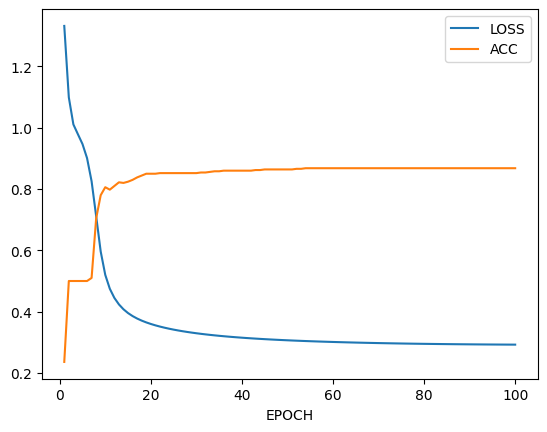

In [190]:
xaxis = list(range(1,101))
plt.plot(xaxis,LOSS, label="LOSS")
plt.plot(xaxis, ACC, label="ACC")
plt.xlabel("EPOCH")
plt.legend()